# 1. Solve classification problem using 'classification.csv' dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('classification.csv')

#### visualise the data, do some EDA

In [3]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


In [4]:
df.shape

(700, 9)

In [5]:
df.describe()

,age,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    object 
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 49.3+ KB


In [7]:
df.default.value_counts()

0    517
1    183
Name: default, dtype: int64

<AxesSubplot:>

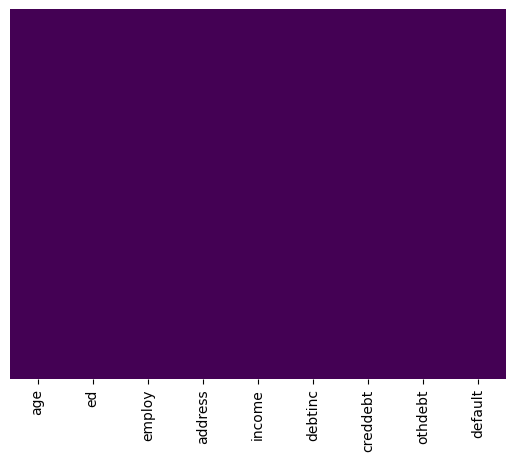

In [8]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

<AxesSubplot:>

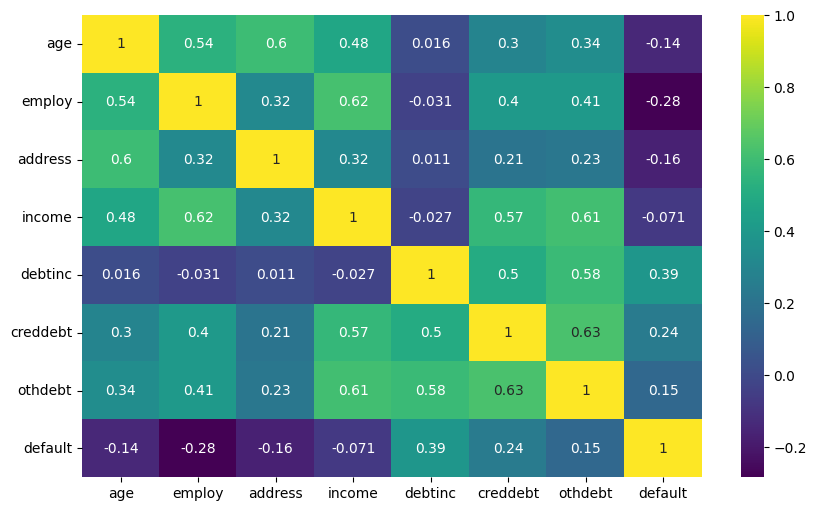

In [9]:
cm = df[df.columns].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

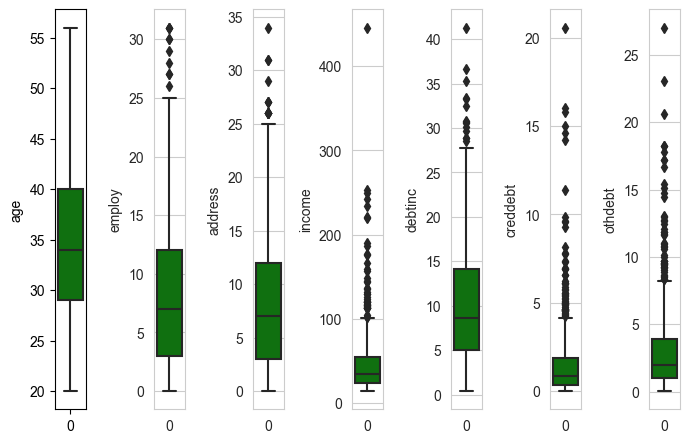

In [10]:
df_exc_obj = df.select_dtypes(exclude=['object'])
df_exc_obj = df_exc_obj.drop(['default'], axis=1)
col = len(df_exc_obj.columns)
plt.figure(figsize=(col, 5*col))
for i in range(0,col):
    plt.subplot(col+1, col, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_exc_obj[df_exc_obj.columns[i]].values, color='green', orient='v')
    plt.ylabel(df_exc_obj.columns[i])
    plt.tight_layout()

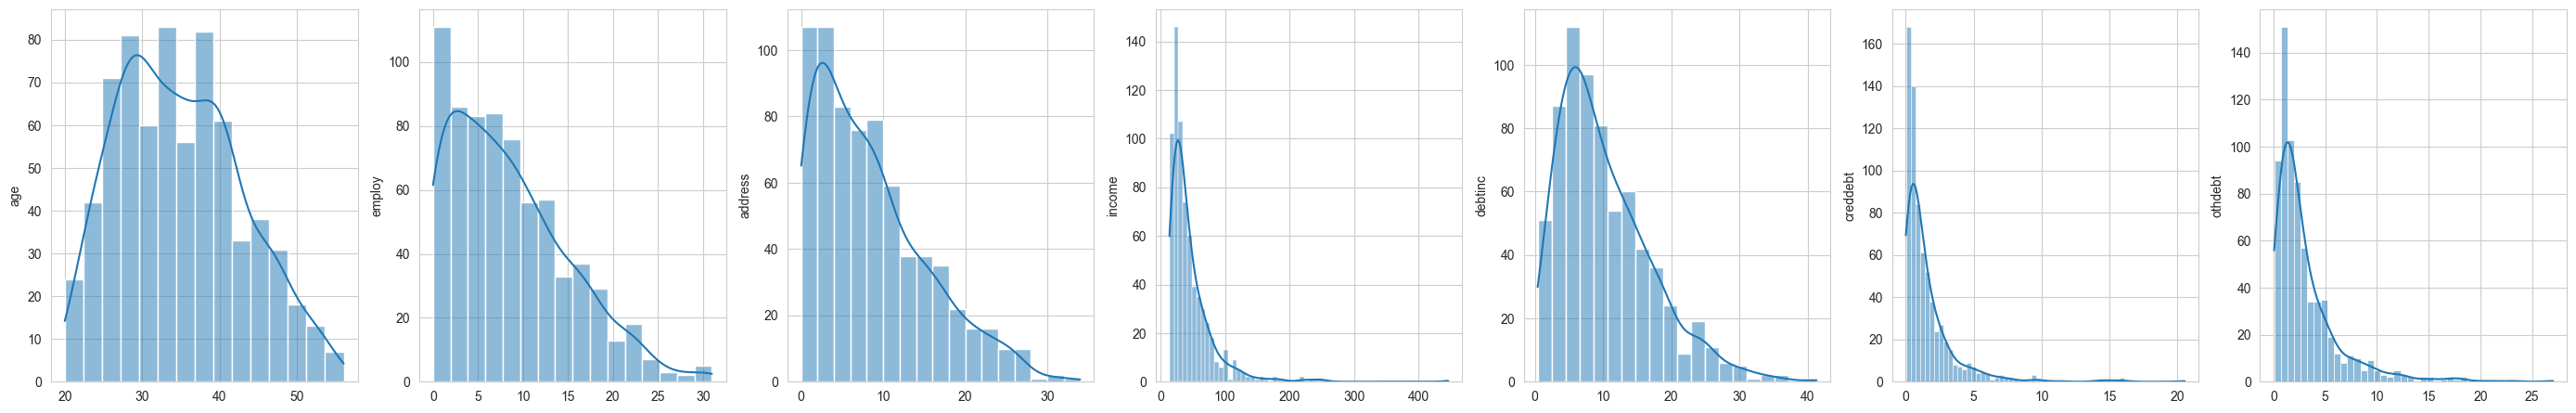

In [11]:
plt.figure(figsize=(5*col,7*col))
for i in range(0,col):
    plt.subplot(col + 1,col,i+1)
    sns.histplot(df_exc_obj[df_exc_obj.columns[i]].values,kde=True)
    plt.ylabel(df_exc_obj.columns[i])

<AxesSubplot:title={'center':'ed'}>

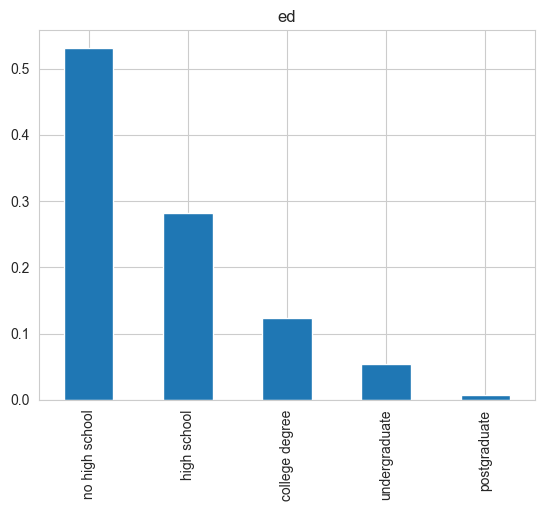

In [12]:
df.ed.value_counts(normalize=True).plot(kind = 'bar', title = 'ed')

##### target variable is 'default'. Apply feature selection, feature scaling, cross validation etc. (anything you think is needed)

In [13]:
X = df.drop(['default'], axis=1)
y = df['default']

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=11)

In [15]:
cat_columns = X_train.select_dtypes(include='object').columns

In [16]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(X_train[cat_columns])

C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [17]:
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[cat_columns])
X_val[ohe.get_feature_names_out()] = ohe.transform(X_val[cat_columns])

In [18]:
X_train.drop(cat_columns, axis=1, inplace=True)
X_val.drop(cat_columns, axis=1, inplace=True)
X_val.head()

,age,employ,address,income,debtinc,creddebt,othdebt,ed_college degree,ed_high school,ed_no high school,ed_postgraduate,ed_undergraduate
510,24,3,1,24,19.1,2.172816,2.411184,0.0,1.0,0.0,0.0,0.0
254,38,5,13,21,9.0,0.449820,1.440180,0.0,0.0,1.0,0.0,0.0
376,34,7,15,40,6.4,0.949760,1.610240,0.0,0.0,0.0,0.0,1.0
641,53,16,31,44,5.6,1.333024,1.130976,0.0,1.0,0.0,0.0,0.0
317,23,0,2,23,6.7,0.468464,1.072536,0.0,0.0,0.0,0.0,1.0


In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [20]:
knn = KNeighborsRegressor(n_neighbors=5)
cross_val_score(knn, X_train, y_train).mean()


0.13192442652991737

In [21]:
gs = GridSearchCV(knn, {'n_neighbors': range(1, 15), 'weights':['uniform', 'distance']})
gs.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 15),
                         'weights': ['uniform', 'distance']})

In [22]:
cross_val_score(gs.best_estimator_, X_val, y_val).mean()

0.026488440830343074

In [23]:
r = Ridge()
gs_r = GridSearchCV(r, {'alpha': [1.1, 1.3, 1.5, 2, 2.5]})
gs_r.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [1.1, 1.3, 1.5, 2, 2.5]})

In [24]:
cross_val_score(gs_r.best_estimator_, X_train, y_train).mean()

0.2589601509588268

In [25]:
final_cls = gs_r.best_estimator_
final_cls.fit(X_train, y_train)

Ridge(alpha=1.1)

In [26]:
final_cls.score(X_val, y_val)

0.32432118008727673

In [27]:
gnb = GaussianNB()

In [28]:
gnb.fit(X_train, y_train)

GaussianNB()

In [29]:
gnb.score(X_train, y_train)

0.7548872180451128

In [30]:
gnb.score(X_val, y_val)

0.6857142857142857

In [31]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gnb,param_grid=params_NB )
gs_NB.fit(X_train, y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [32]:
gs_NB.score(X_train, y_train)

0.7714285714285715

In [33]:
gs_NB.score(X_val, y_val)

0.7428571428571429

In [34]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
clf.score(X_train, y_train)

0.8135338345864662

In [36]:
clf.score(X_val, y_val)

0.7714285714285715

In [37]:
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
grid['shrinkage'] = np.arange(0, 1, 0.01)
gs_ld = GridSearchCV(clf, grid, scoring='accuracy')
gs_ld.fit(X_train, y_train)

C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
503 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not suppo

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [38]:
gs_ld.score(X_train, y_train)

0.8090225563909774

In [39]:
gs_ld.score(X_val, y_val)

0.8

In [40]:
gs_ld.best_estimator_

LinearDiscriminantAnalysis(shrinkage=0.02, solver='lsqr')

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [42]:
clf.score(X_train, y_train)

0.7804511278195488

In [43]:
clf.score(X_val, y_val)

0.6857142857142857

In [44]:
params = [{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}]
gs_qd = GridSearchCV(clf, params, scoring='accuracy')
gs_qd.fit(X_train, y_train)

C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Machine Learning\AppData\Roaming\Python\P

GridSearchCV(estimator=QuadraticDiscriminantAnalysis(),
             param_grid=[{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}],
             scoring='accuracy')

In [45]:
gs_qd.score(X_train, y_train)

0.7518796992481203

In [46]:
gs_qd.score(X_val, y_val)

0.8

In [47]:
# the best classifier is LinearDiscriminantAnalysis(shrinkage=0.02, solver='lsqr')

In [48]:
deg = 3
poly = PolynomialFeatures(degree = deg, include_bias=False, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)

In [49]:
clf = LinearDiscriminantAnalysis(shrinkage=0.02, solver='lsqr')
clf.fit(X_train_poly, y_train)
clf.score(X_train_poly, y_train)

0.8360902255639098

In [50]:
clf.score(X_val_poly, y_val)

0.7428571428571429

In [51]:
# the best classifier still is without Poly

In [52]:
clf = LinearDiscriminantAnalysis(shrinkage=0.02, solver='lsqr')
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8090225563909774

In [53]:
clf.score(X_val, y_val)

0.8

# 2. Print accuracy, confusion matrix, precision and recall on train and test (and maybe validation) datasets.

##### do not use any libraries for metrics, implement yourself

In [54]:
pred_train = clf.predict(X_train)
print('acc train',sum(pred_train == y_train)/len(y_train))

acc train 0.8090225563909774


In [55]:
pred_val = clf.predict(X_val)
print('acc validation',sum(pred_val == y_val)/len(y_val))

acc validation 0.8


In [71]:
def CM(pred, act):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i, item in enumerate(pred):
        if item == 1:
            if act.values[i] == pred[i]:
                TP += 1
            else:
                FP += 1
        else:
            if act.values[i] == pred[i]:
                TN += 1
            else:
                FN += 1
    return   {'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN}
# print('True Positive', TP) 
# print('True Negative', TN)
# print('False Positive', FP) 
# print('False Negative', FN) 

In [72]:
conv_Matrix = CM(pred_train, y_train)
CM(pred_train, y_train)

{'TP': 81, 'TN': 457, 'FP': 33, 'FN': 94}

In [73]:

Precision_1_train = conv_Matrix['TP']/(conv_Matrix['TP']+conv_Matrix['FP'])
print('Precission for class 1 on train', Precision_1_train)
Precision_0_train = conv_Matrix['TN']/(conv_Matrix['TN']+conv_Matrix['FN'])
print('Precission for class 0 on train', Precision_0_train)

Precission for class 1 on train 0.7105263157894737
Precission for class 0 on train 0.8294010889292196


In [74]:
Recall_1_train = conv_Matrix['TP']/(conv_Matrix['TP']+conv_Matrix['FN'])
print('Recall for class 1 on train', Recall_1_train)
Recall_0_train = conv_Matrix['TN']/(conv_Matrix['TN']+conv_Matrix['FP'])
print('Recall for class 0 on train', Recall_0_train)

Recall for class 1 on train 0.46285714285714286
Recall for class 0 on train 0.9326530612244898


In [79]:
conv_Matrix = CM(pred_val, y_val)
CM(pred_val, y_val)

{'TP': 4, 'TN': 24, 'FP': 3, 'FN': 4}

In [80]:
Precision_1_val = conv_Matrix['TP']/(conv_Matrix['TP']+conv_Matrix['FP'])
print('Precission for class 1 on val', Precision_1_val)
Precision_0_val = conv_Matrix['TN']/(conv_Matrix['TN']+conv_Matrix['FN'])
print('Precission for class 0 on val', Precision_0_val)

Precission for class 1 on val 0.5714285714285714
Precission for class 0 on val 0.8571428571428571


In [82]:
Recall_1_val = conv_Matrix['TP']/(conv_Matrix['TP']+conv_Matrix['FN'])
print('Recall for class 1 on val', Recall_1_val)
Recall_0_val = conv_Matrix['TN']/(conv_Matrix['TN']+conv_Matrix['FP'])
print('Recall for class 0 on val', Recall_0_val)

Recall for class 1 on val 0.5
Recall for class 0 on val 0.8888888888888888


In [64]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_train,pred_train).ravel()
print('tn', tn)
print('fp', fp)
print('fn', fn)
print('tp', tp)

tn 457
fp 33
fn 94
tp 81


In [65]:
tn, fp, fn, tp = confusion_matrix(y_val,pred_val).ravel()
print('tn', tn)
print('fp', fp)
print('fn', fn)
print('tp', tp)

tn 24
fp 3
fn 4
tp 4


In [70]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, pred_train))
print(recall_score(y_train, pred_train))

0.7105263157894737
0.46285714285714286


In [77]:
print(precision_score(y_val, pred_val))
print(recall_score(y_val, pred_val))

0.5714285714285714
0.5
